# Install and import dependencies

In [2]:
!pip install -q jmd_imagescraper
!pip install -Uqq fastbook

     |████████████████████████████████| 719 kB 13.5 MB/s 
     |████████████████████████████████| 1.2 MB 64.3 MB/s 
     |████████████████████████████████| 4.4 MB 81.3 MB/s 
     |████████████████████████████████| 362 kB 22.0 MB/s 
     |████████████████████████████████| 1.1 MB 63.9 MB/s 
     |████████████████████████████████| 212 kB 84.0 MB/s 
     |████████████████████████████████| 101 kB 11.1 MB/s 
     |████████████████████████████████| 140 kB 64.3 MB/s 
     |████████████████████████████████| 596 kB 83.8 MB/s 
     |████████████████████████████████| 127 kB 62.3 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 144 kB 67.1 MB/s 
     |████████████████████████████████| 271 kB 68.1 MB/s 
     |████████████████████████████████| 6.6 MB 48.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.1

In [3]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path
from jmd_imagescraper.core import *

# Get images from DuckDuckGo

In [4]:
!rm -rf /content/plants

In [5]:
root = "/content/plants"
duckduckgo_search(root, "dionaea", "dionaea", max_results=100)
duckduckgo_search(root, "drosera", "drosera", max_results=100)
duckduckgo_search(root, "nepenthes", "nepenthes", max_results=100)
duckduckgo_search(root, "random", "random images", max_results=100)

Duckduckgo search: dionaea


Duckduckgo search: drosera


Duckduckgo search: nepenthes


Duckduckgo search: random images


[Path('/content/plants/random/001_c277db73.jpg'),
 Path('/content/plants/random/002_53c3907a.jpg'),
 Path('/content/plants/random/003_fb0fea22.jpg'),
 Path('/content/plants/random/004_b755c7a0.jpg'),
 Path('/content/plants/random/005_2dd1e8ce.jpg'),
 Path('/content/plants/random/006_9339ffa3.jpg'),
 Path('/content/plants/random/007_c9132a14.jpg'),
 Path('/content/plants/random/008_0947d5c1.jpg'),
 Path('/content/plants/random/009_1ea2b672.jpg'),
 Path('/content/plants/random/010_0eb3b426.jpg'),
 Path('/content/plants/random/011_41ddc278.jpg'),
 Path('/content/plants/random/012_b153e0d0.jpg'),
 Path('/content/plants/random/013_740d70ab.jpg'),
 Path('/content/plants/random/014_fad576f5.jpg'),
 Path('/content/plants/random/015_9ffd462d.jpg'),
 Path('/content/plants/random/016_f26101cd.jpg'),
 Path('/content/plants/random/017_d4426f01.jpg'),
 Path('/content/plants/random/018_eadb1264.jpg'),
 Path('/content/plants/random/019_02c13f0a.jpg'),
 Path('/content/plants/random/020_2f89c0a9.jpg'),


In [6]:
path = Path('plants')
fns = get_image_files(path)

In [7]:
failed = verify_images(fns)
failed.map(Path.unlink);

# Create Dataloader and show results

In [8]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128))
    
dls = plants.dataloaders(path)

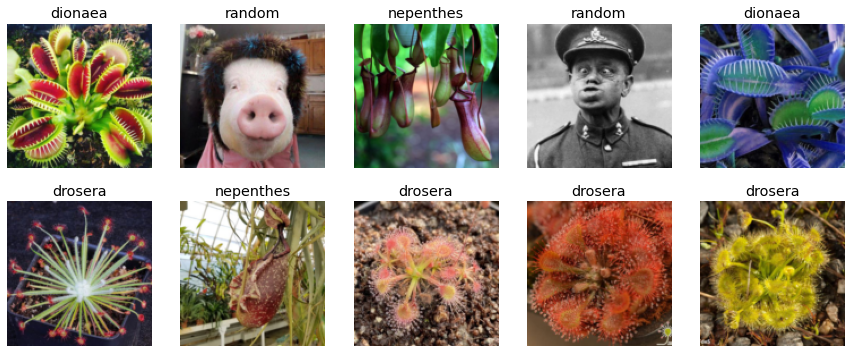

In [9]:
dls.valid.show_batch(max_n=10, nrows=2)

# Apply Transformations

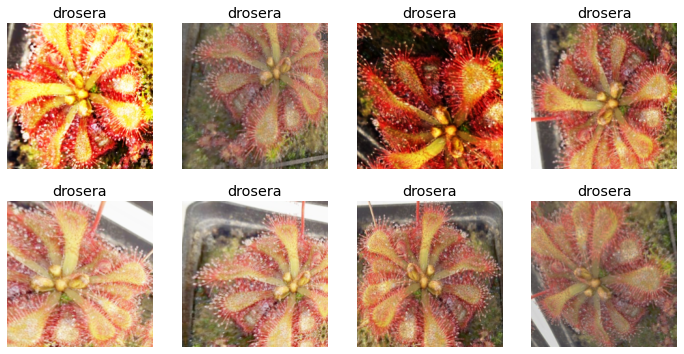

In [14]:
plants = plants.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(
        max_lighting=0.6,
        max_rotate=180
                      ))
dls = plants.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# Train model

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,2.038493,1.041920,0.425000,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.748750,0.154794,0.062500,01:07
1,0.563371,0.035670,0.000000,01:06
2,0.439610,0.018880,0.000000,01:06
3,0.368476,0.019795,0.000000,01:08


# View Results

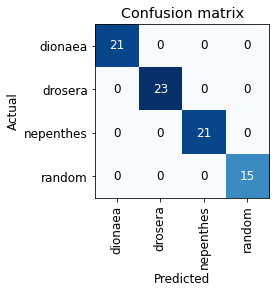

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# View the predictions with lowest confidence

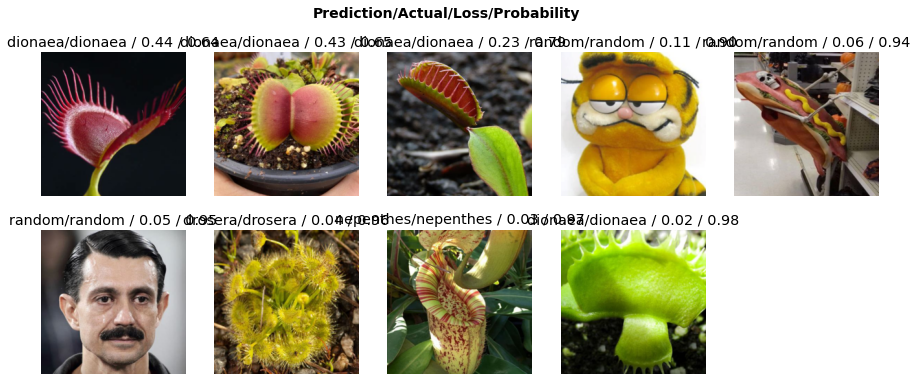

In [17]:
interp.plot_top_losses(10, nrows=2)

# Export model

In [18]:
learn.export('model.pkl')

# Try Inference

In [19]:
predictor = load_learner('model.pkl')

In [22]:
pred, pred_idx, probs = predictor.predict('YOUR_FILENAME.jpg')
print(f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}')

Prediction: dionaea; Probability: 0.9962
